# Внешние модули

Модули бывают двух видов:
1. стандартные: устанавливаются вместе с Python.
2. внешние: нужно сначала скачать и потом ручками установить.

Внешних модулей суествует невероятно много. Написать их может любой программист и выложить в свободный доступ, а исходный код и документацию разместить, например, на Github. Модули, которые существуют достаточно давно, а значит, и успешно используются, имеют не просто страничку на Github, а целый сайт, максимально подробно описывающий способы взаимодействия с функционалом модуля.

Обзорно посмотрим несколько таких модулей:


*   `requests` - модуль для выполнения запросов к интернет-ресурсам.
*   `beautifulsoup4` - модуль для работы с данными, полученными из интернет-ресурсов.
*   `pandas` - модуль для работы с большими таблицами.
*   `numpy` - модуль для работы с математическими операциями.
*   `matplotlib` - модуль для построения графиков.



## Установка внешних модулей

Прежде чем подгрузить внешний модуль в программу, его нужно скачать и установить. Если мы попробуем просто вызвать внешний модуль, в большинстве случаев Python любезно подскажет, что мы пытаемся сделать что-то неправильное. В большинстве, но не всегда. Некоторые внешние модули уже стали неотъемлемой частью Python и устанавливаются вместе с ним. Такой, например, модуль `requests`. Если модуль не предустановлен, то его устанавливают с помощью менеджера пакетов `pip`.

In [ ]:
!pip install bs4

Если модуль уже установлен, Python вам об этом сообщит. В Google Colab достаточно много модулей уже предустановлено. В PyCharm для установки модуля надо перейти на вкладочку `Terminal` и ввести `pip install название_модуля`. Восклицательный знак писать не нужно, это особенность взаимодействия с Google Colab.

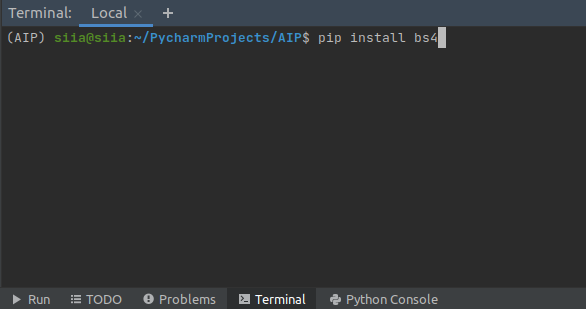

## requests

`requests` - это модуль для выполнения различного рода запросов к интернет-ресурсам. Он позволяет выполнять следующие действия:


*   обращаться к веб-странице и получать с нее информацию; выполнять так называемые GET-запросы
*   передавать веб-ресурсу информацию, выполнять POST-запросы
*   производить аутентификацию

Обо всем, что умеет `requests`, всегда можно почитать в [документации](https://requests.readthedocs.io/en/master/).



Получать какую-то информацию требуется значительно чаще. Посмотрим этот случай. Например, заглянем на сайт Гринписа: https://greenpeace.ru/news/2021/01/14/vlasti-francii-otvetjat-v-sude-za-klimaticheskoe-bezdejstvie/.

In [ ]:
import requests
response = requests.get("https://greenpeace.ru/news/2021/01/14/vlasti-francii-otvetjat-v-sude-za-klimaticheskoe-bezdejstvie/")
response

<Response [200]>

Объект `response` хранит информацию о статусе страницы. Мы сейчас получили статус 200. Это значит, что страница доступна и с информации с нее можно работать. Если статут равен 404, значит, страница не существует, 403 - доступ запрещен, 407 - необходима авторизация. Статусов существует очень [много](https://requests.readthedocs.io/en/master/api/#status-code-lookup).

Чтобы проверить, какой статус у страницы, можно вопспользоваться методом `status_code`.

In [ ]:
if response.status_code == 200:
  print("ok")

ok


Но нам бы хотелось получать не только сообщение о том, что со страничкой можно работать, но и информацию с нее. Это можно сделать методом `text`.

In [ ]:
response.text

'<!DOCTYPE html>\n<html class="color-scheme-base_light" data-layout="row" lang="ru">\n    <head>\n\n        <meta charset="UTF-8">\n\t\t<meta name="theme-color" content="#66сс00"/>\n        <meta name="viewport" content="width=device-width, initial-scale=1.0">\n        <link rel="profile" href="http://gmpg.org/xfn/11">\n\t\t<meta name="googlebot" content="all">\n\t\t<meta name="googlebot-news" content="all">\n\t\t<meta name="google-site-verification" content="d_z0H5IUA8Tqd-n6Ml983KPwdvYqEVGlpnbStVrgaCY" />\n\t\t<link rel="alternate" href="https://greenpeace.ru" hreflang="ru-ru" />\n\t<meta property="og:image" content=""/>\n\t<meta property="og:title" content="Власти Франции ответят в суде за климатическое бездействие"/>\n\t<meta name="Description" property="og:description"\tcontent="Сегодня состоялось слушание дела. Требование поддержало более двух миллионов французов." />\n\n\n        <title>Власти Франции ответят в суде за климатическое бездействие</title>\n<link rel=\'dns-prefetch\'

Т.к. веб-странички формируеются при помощи html-разметки, мы ее и получаем. html-разметка, по сути, текстовый файлик. Дальше нам надо как-то вытягивать полезную информацию.

Часто при помощи `requests` осуществляют работу с API какого-то ресурса. API Вконтакте или Яндекса, например.


> API (application programming interface) - описание способов взаимодействия одной программы с другой. Практически всегда для работы с API ресурса нужен ключ доступа.

Очень простой API имеет, например, [Yandex Spellchecker API](https://yandex.ru/dev/speller/doc/dg/concepts/api-overview.html) - сервис для проверки орфографии.


Напишем простую функцию для проверки орфографии с помощью API Яндекса. На вход функция будет принимать одно слово или текст. Под текстом понимаем комбинации непробельных символов, разделенных одним или несколькими пробельными символами. Возвращает функция само слово и варианты исправлений для него. В случае, если на вход поступил текст - возвращается список слов текста с вариантами исправлений.

In [ ]:
import requests

In [ ]:
def check_spelling(text):
  domain = "https://speller.yandex.net/services/spellservice.json"
  words = text.split()
  if len(words) == 1:
    response = requests.get(domain + "/checkText?text=" + words[0])
    if response:
      return response.json()[0]["word"], response.json()[0]["s"]
    else:
      return None
  elif len(words) > 1:
    words = "+".join(words)
    response = requests.get(domain + "/checkText?text=" + words)
    if response:
      response = [(i["word"], i["s"]) for i in response.json()]
      return response
    else:
      return None
  return None

In [ ]:
check_spelling("Байес алгаритм")

[('алгаритм', ['алгоритм'])]

Интересно работать с API Вконтакте, но для этого нужно сначала создать приложение для работы с API и изучить его методы.

Для работы с данными из ВКонтакте необходимо получить токен доступа, зарегистрировав свое приложение, а именно:
1. заходим на страничку [VK Developers](https://vk.com/dev) и переходим во вкладку "Мои приложения"
2. создаем новое приложение, тип - "Standalone-приложение"
3. даем приложению название
4. в меню слева переходим в "Настройки" и сохраняем себе ID приложения
5. важно не забыть подключить приложение
6. самый простой способ получить токен - вставить в адресную строку браузера ссылку: https://oauth.vk.com/authorize?client_id=YourClientID&scope=ads&response_type=token, но вместо **YourClientID** нужно поставить тот ID приложения, который мы сохранили в пункте 4
7. сслыка перекинет на новую страницу, где ВК запросит доступ к данным, а затем еще на одну с предупреждением о том, что нельзя копировать полученный токен куда попало. На этой странице из адресной строки нужно скопировать то, что написано после `access_token=`. Это и есть токен доступа.

Еще одной интересной задачкой, которую можно решить при помощи модуля `requests`, является определение местоположения по IP-адресу. Для этого нам потребуется ресурс, содержащий информацию об IP-адресах. Вот [этот](https://ip-api.com), к примеру.

In [ ]:
import requests
domain = "https://ipinfo.io/"
response = requests.get(domain + "json") # определить текущее местоположение
response.json()

{'city': 'Washington',
 'country': 'US',
 'hostname': '212.41.221.35.bc.googleusercontent.com',
 'ip': '35.221.41.212',
 'loc': '38.8951,-77.0364',
 'org': 'AS15169 Google LLC',
 'postal': '20045',
 'readme': 'https://ipinfo.io/missingauth',
 'region': 'Washington, D.C.',
 'timezone': 'America/New_York'}

In [ ]:
response = requests.get(domain + "139.130.4.5/json") # определить местоположение по конкретному IP-адресу
response.json()

{'city': 'Canberra',
 'country': 'AU',
 'ip': '139.130.4.5',
 'loc': '-35.2835,149.1281',
 'org': 'AS1221 Telstra Corporation Ltd',
 'postal': '2600',
 'readme': 'https://ipinfo.io/missingauth',
 'region': 'Australian Capital Territory',
 'timezone': 'Australia/Sydney'}

Здесь данные получены в формате json - классическом формате для хранения структурированных текстовых данных. Обычно он имеет вид словаря (пары ключ-значение). Соответственно, работать с этим форматом можно, как с обычным словарем.

## beautifulsoup4

Этот модуль упрощает работу с html-разметкой странички. Вернемся к примеру с сайтом Гринписа.

In [ ]:
import requests
response = requests.get("https://greenpeace.ru/news/2021/01/14/vlasti-francii-otvetjat-v-sude-za-klimaticheskoe-bezdejstvie/")
response.text

'<!DOCTYPE html>\n<html class="color-scheme-base_light" data-layout="row" lang="ru">\n    <head>\n\n        <meta charset="UTF-8">\n\t\t<meta name="theme-color" content="#66сс00"/>\n        <meta name="viewport" content="width=device-width, initial-scale=1.0">\n        <link rel="profile" href="http://gmpg.org/xfn/11">\n\t\t<meta name="googlebot" content="all">\n\t\t<meta name="googlebot-news" content="all">\n\t\t<meta name="google-site-verification" content="d_z0H5IUA8Tqd-n6Ml983KPwdvYqEVGlpnbStVrgaCY" />\n\t\t<link rel="alternate" href="https://greenpeace.ru" hreflang="ru-ru" />\n\t<meta property="og:image" content=""/>\n\t<meta property="og:title" content="Власти Франции ответят в суде за климатическое бездействие"/>\n\t<meta name="Description" property="og:description"\tcontent="Сегодня состоялось слушание дела. Требование поддержало более двух миллионов французов." />\n\n\n        <title>Власти Франции ответят в суде за климатическое бездействие</title>\n<link rel=\'dns-prefetch\'

In [ ]:
from bs4 import BeautifulSoup as bs
soup = bs(response.text, "html.parser")
soup

<!DOCTYPE html>

<html class="color-scheme-base_light" data-layout="row" lang="ru">
<head>
<meta charset="utf-8"/>
<meta content="#66сс00" name="theme-color">
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<link href="http://gmpg.org/xfn/11" rel="profile"/>
<meta content="all" name="googlebot"/>
<meta content="all" name="googlebot-news"/>
<meta content="d_z0H5IUA8Tqd-n6Ml983KPwdvYqEVGlpnbStVrgaCY" name="google-site-verification">
<link href="https://greenpeace.ru" hreflang="ru-ru" rel="alternate">
<meta content="" property="og:image">
<meta content="Власти Франции ответят в суде за климатическое бездействие" property="og:title">
<meta content="Сегодня состоялось слушание дела. Требование поддержало более двух миллионов французов." name="Description" property="og:description"/>
<title>Власти Франции ответят в суде за климатическое бездействие</title>
<link href="//fonts.googleapis.com" rel="dns-prefetch"/>
<link href="//s.w.org" rel="dns-prefetch"/>
<link href="

Это уже вполне читаемо, но нам обычно нужно не все, а только самая полезная информация. К примеру, заголовок и текст. Для этого нам нужно уметь читать html-разметку и понимать, под какими тегам содержится нужная информация. Заголовки обычно хранятся под тегами `h1`, `h2` или `h3`. Основной текст под тегом `p`. `beautifulsoup` имеет массу полезных методов для извлечения нужной информации со странички. Со всеми его возможностями всегда можно ознакомиться в [документации](https://www.crummy.com/software/BeautifulSoup/bs4/doc.ru/).

Одну и ту же задачу в программировании обычно можно решить более чем одним способом. Так, например, и вытащить нужную информацию со странички можно по-разному. Можно по тегам разметки.

In [ ]:
title = soup.find("h1", {"class": "padding-top-30 padding-bottom-10 site-typeface-title typo-size-xlarge post-title"})
print(title)
print(f"Title: {title.text.strip()}")

<h1 class="padding-top-30 padding-bottom-10 site-typeface-title typo-size-xlarge post-title">
                      Власти Франции ответят в суде за климатическое бездействие                     </h1>
Title: Власти Франции ответят в суде за климатическое бездействие


А можно воспользоваться специальными методами `beautifulsoup`.

In [ ]:
soup.title

<title>Власти Франции ответят в суде за климатическое бездействие</title>

In [ ]:
soup.title.string

'Власти Франции ответят в суде за климатическое бездействие'

Получить текст странички обычно сложнее, т.к. авторы непредсказуемы в выборе тегов. Поэтому тут наиболее оптимальный способ работы - теги.

In [ ]:
paragraphs_soup = soup.findAll("span", {"style": "font-weight: 400;"})
paragraphs_soup

[<span style="font-weight: 400;">Greenpeace Франции совместно с другими НКО (Notre Affaire à Tous, Фонд Николя Юло и Oxfam France) требуют от властей возместить ущерб, причинённый гражданам страны из-за политики в области экологии и начать активные действия в рамках предыдущих соглашений. Соответствующий иск подали ещё два года назад из-за бездействия государства в решении проблемы климатического кризиса. Сегодня состоялось слушание дела в суде Парижа, решение по которому будет вынесено в течение двух недель. </span>,
 <span style="font-weight: 400;">Хотя климатический кризис остаётся одной из главных проблем для французов (в 2020 году были побиты новые температурные рекорды), государство продолжает откладывать принятие необходимых мер. Выбросы парниковых газов в течение последних пяти лет продолжали снижаться вдвое медленнее, чем показатели, предусмотренные законом. В декабре прошлого года Высший совет по климату (независимый орган, созданный в 2018 году и состоящий из экспертов по кл

In [ ]:
content = "".join([item.text for item in paragraphs_soup])
content

'Greenpeace Франции совместно с другими НКО (Notre Affaire à Tous, Фонд Николя Юло и Oxfam France) требуют от властей возместить ущерб, причинённый гражданам страны из-за политики в области экологии и начать активные действия в рамках предыдущих соглашений. Соответствующий иск подали ещё два года назад из-за бездействия государства в решении проблемы климатического кризиса. Сегодня состоялось слушание дела в суде Парижа, решение по которому будет вынесено в течение двух недель.\xa0Хотя климатический кризис остаётся одной из главных проблем для французов (в 2020 году были побиты новые температурные рекорды), государство продолжает откладывать принятие необходимых мер. Выбросы парниковых газов в течение последних пяти лет продолжали снижаться вдвое медленнее, чем показатели, предусмотренные законом. В декабре прошлого года Высший совет по климату (независимый орган, созданный в 2018 году и состоящий из экспертов по климату) проанализировал, что две трети плана стимулирования не работают 

## matplotlib

Это огромный модуль для визуализации графиков. Охватывает всевозможную математику и статистику. Большинство других модулей визуализации работают на его основе. Ссылочка на [документацию](https://matplotlib.org/stable/index.html).

Посмотрим, как можно строить графики функций с помощью matplotlib.

In [ ]:
!pip install matplotlib

In [1]:
import matplotlib.pyplot as plt

Чтобы построить график, нужно вызвать функцию plot. В нее передается то, что мы хотим визуализировать. Это может быть набор значений, функция, которая задает график и дополнительные параметры. Также существует ряд функций, который упрощает чтение графика, например, можно подписать оси и дать графику название. 

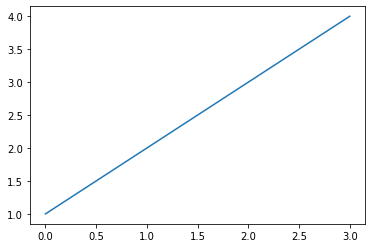

In [2]:
plt.plot([1, 2, 3, 4])
plt.show()

Если в функцию plot передается просто набор чисел, то matplotlib считает, что ему передали значения переменной y. Что хранится в переменной x, он додумывает сам. По умолчанию подбирается набор значений такой же длины, что и переданный, только отсчет идет от 0, как у всего в Python. Именно поэтому на получившемся графике максимальный х = 3. Сделаем так, чтобы все было корректно.

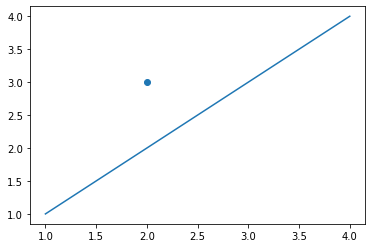

In [3]:
plt.plot([1, 2, 3, 4], [1, 2, 3, 4])
plt.scatter(2, 3)
plt.show()

Вывод: matplotlib построит любой график просто по набору точек.

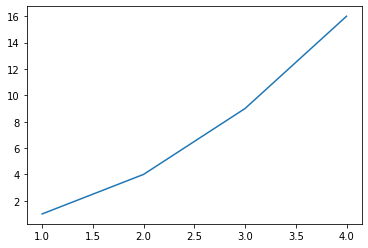

In [ ]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16]);

Можно эти точки не соединять. Тогда нужно указать стиль графика ro.

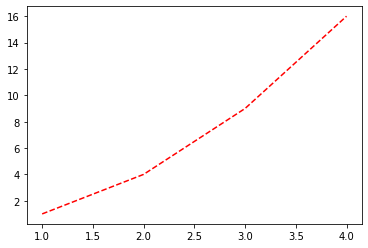

In [ ]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], "r--");

> Чтобы сразу отобразить график в Google Colab, достаточно просто поставить точку с запятой в конце. В PyCharm нужно обязательно писать plt.show().



Аналогичным образом можно задать не просто какую-то кривую, а график функции. Например, построим $y(x) = x^2$.

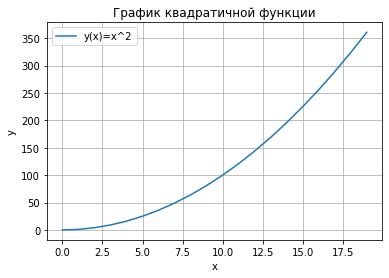

In [ ]:
x = list(range(0, 20)) # задаем значения х
y = [x1**2 for x1 in x] # считаем у(х)
plt.plot(x, y, label="y(x)=x^2") # строим график
plt.xlabel("x") # подписываем ось х
plt.ylabel("y") # подписываем ось у
plt.title("График квадратичной функции") # подписываем график
plt.legend()# добавляем легенду
plt.grid(True); 

На одном графике можно изобрать несколько функций. Например, $y(x)=x$ и $y(x)=x^2$.

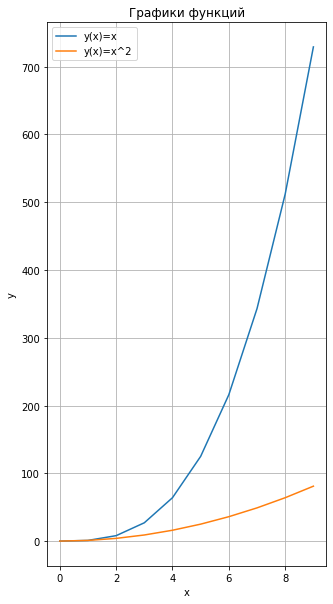

In [ ]:
x = list(range(0, 10)) # задаем значения х
y1 = [x1**2 for x1 in x] # считаем значения для квадратичной функции
y2 = [x1**3 for x1 in x]
_, ax = plt.subplots(figsize=(5, 10)) # создаем график для нескольких кривых
ax.plot(x, y2, label="y(x)=x") # строим график линейной функции
ax.plot(x, y1, label="y(x)=x^2") # строим график квадратичной функции
ax.set_xlabel("x") # подписываем ось х
ax.set_ylabel("y") # подписываем ось у
ax.set_title("Графики функций") # подписываем график
ax.grid(True) # добавляем сетку
plt.legend() # добавляем легенду
plt.show()

И можно на одной картинке уместить несколько графиков.

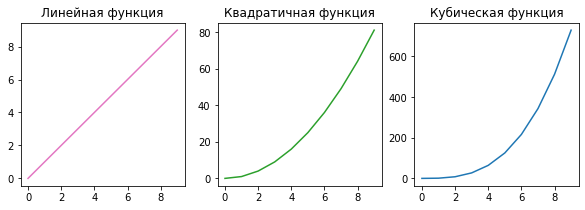

In [ ]:
x = list(range(0, 10)) # задаем значения х
y1 = [x1**2 for x1 in x] # считаем значения для квадратичной функции
y2 = [x1**3 for x1 in x] # считаем значения для кубической функции

_, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 3)) # создаем график для нескольких кривых
ax1.plot(x, x, "tab:pink") # строим график линейной функции
ax1.set_title("Линейная функция")
ax2.plot(x, y1, "tab:green") # строим график квадратичной функции
ax2.set_title("Квадратичная функция")
ax3.plot(x, y2, label="y(x)=x^3") # строим график кубической функции
ax3.set_title("Кубическая функция")
plt.show()